## Analysis of the TED World ##

### About this Dataset ###
These datasets contain information about all audio-video recordings of TED Talks uploaded to the official TED.com website until September 2012. The TED Talks dataset contains information about all talks including number of views,
number of comments, descriptions, speakers, and titles.

#### Contents of the Dataset ####
1. id: The ID of the talk. Has no inherent meaning. Values obtained by resetting index.
2. url: Url pointing to the talk on http://www.ted.com
3. title: The title of the talk
4. description: Short description of the talk
5. transcript: The human-made transcript in English of the talk as available on the TED website
6. related_tags: The related tags that refer to the talk assigned by TED editorial staff
7. related_themes: The related themes that refer to the talk assigned by TED editorial staff (as of April 2013, these themes are no longer visible on the TED website)
8. related_videos: A list of videos that are related to the given talk, assigned by TED editorial staff
9. ted_event: The name of the event in which the talk was presented
10. speaker: The full name of the speaker of the talk
11. publish_date: The day on which the talk was published
12. film_date: The day on which the talk was filmed
13. views: The total number of views of the talk at the time of crawling
14. comments: The number of comments on the talk

### Task ###
Perform an in-depth analysis of the given data.

##there is no

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Load the dataset
ted_main = pd.read_csv('ted_main.csv')
ted_main.head(5)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [3]:
# check data types of the columns
ted_main.dtypes

comments               int64
description           object
duration               int64
event                 object
film_date              int64
languages              int64
main_speaker          object
name                  object
num_speaker            int64
published_date         int64
ratings               object
related_talks         object
speaker_occupation    object
tags                  object
title                 object
url                   object
views                  int64
dtype: object

Based on the variables' description, the data types seem okay, film_date and published_date should be converted to proper format

In [4]:
# convert the two feature to date format
ted_main['film_date'] = pd.to_datetime(ted_main.film_date,unit = 's',errors = 'coerce')
ted_main['published_date'] = pd.to_datetime(ted_main.published_date,unit = 's', errors = 'coerce')
ted_main.dtypes

comments                       int64
description                   object
duration                       int64
event                         object
film_date             datetime64[ns]
languages                      int64
main_speaker                  object
name                          object
num_speaker                    int64
published_date        datetime64[ns]
ratings                       object
related_talks                 object
speaker_occupation            object
tags                          object
title                         object
url                           object
views                          int64
dtype: object

In [5]:
ted_main.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,2006-02-25,43,Al Gore,Al Gore: Averting the climate crisis,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,2006-02-24,26,David Pogue,David Pogue: Simplicity sells,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,2006-02-26,35,Majora Carter,Majora Carter: Greening the ghetto,1,2006-06-27 00:11:00,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,2006-02-22,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,2006-06-27 20:38:00,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [6]:
ted_main.reset_index(drop = True)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,2006-02-25,43,Al Gore,Al Gore: Averting the climate crisis,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,2006-02-24,26,David Pogue,David Pogue: Simplicity sells,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,2006-02-26,35,Majora Carter,Majora Carter: Greening the ghetto,1,2006-06-27 00:11:00,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,2006-02-22,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,2006-06-27 20:38:00,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869
5,672,"Tony Robbins discusses the ""invisible forces"" ...",1305,TED2006,2006-02-02,36,Tony Robbins,Tony Robbins: Why we do what we do,1,2006-06-27 20:38:00,"[{'id': 7, 'name': 'Funny', 'count': 1102}, {'...","[{'id': 229, 'hero': 'https://pe.tedcdn.com/im...",Life coach; expert in leadership psychology,"['business', 'culture', 'entertainment', 'goal...",Why we do what we do,https://www.ted.com/talks/tony_robbins_asks_wh...,20685401
6,919,When two young Mormon missionaries knock on Ju...,992,TED2006,2006-02-24,31,Julia Sweeney,Julia Sweeney: Letting go of God,1,2006-07-10 00:11:00,"[{'id': 3, 'name': 'Courageous', 'count': 477}...","[{'id': 22, 'hero': 'https://pe.tedcdn.com/ima...","Actor, comedian, playwright","['Christianity', 'God', 'atheism', 'comedy', '...",Letting go of God,https://www.ted.com/talks/julia_sweeney_on_let...,3769987
7,46,Architect Joshua Prince-Ramus takes the audien...,1198,TED2006,2006-02-23,19,Joshua Prince-Ramus,Joshua Prince-Ramus: Behind the design of Seat...,1,2006-07-10 00:11:00,"[{'id': 9, 'name': 'Ingenious', 'count': 195},...","[{'id': 750, 'hero': 'https://pe.tedcdn.com/im...",Architect,"['architecture', 'collaboration', 'culture', '...",Behind the design of Seattle's library,https://www.ted.com/talks/joshua_prince_ramus_...,967741
8,852,Philosopher Dan Dennett calls for religion -- ...,1485,TED2006,2006-02-02,32,Dan Dennett,Dan Dennett: Let's teach religion -- all relig...,1,2006-07-18 00:11:00,"[{'id': 3, 'name': 'Courageous', 'count': 562}...","[{'id': 71, 'hero': 'https://pe.tedcdn.com/ima...","Philosopher, cognitive scientist","['God', 'TED Brain Trust', 'atheism', 'brain',...",Let's teach religion -- all religion -- in sch...,https://www.ted.com/talks/dan_dennett_s_re

### 15 most viewed TED Talks ###
Which are the 15 most viewed TED talks of all time?

In [7]:
by_views = ted_main.groupby('views')
most_viewed = by_views['title'].value_counts().tail(15).sort_values(ascending = False)
most_viewed

views     title                                                              
47227110  Do schools kill creativity?                                            1
43155405  Your body language may shape who you are                               1
34309432  How great leaders inspire action                                       1
31168150  The power of vulnerability                                             1
22270883  10 things you didn't know about orgasm                                 1
21594632  How to speak so that people want to listen                             1
21190883  My stroke of insight                                                   1
20685401  Why we do what we do                                                   1
20475972  This is what happens when you reply to spam email                      1
19787465  Looks aren't everything. Believe me, I'm a model.                      1
18830983  The puzzle of motivation                                               1
17629275 

In [8]:
most_viewed2 = ted_main.sort_values('views',ascending = False)
top15 = most_viewed2.head(15)
top15

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1346,2290,"Body language affects how others see us, but i...",1262,TEDGlobal 2012,2012-06-26,51,Amy Cuddy,Amy Cuddy: Your body language may shape who yo...,1,2012-10-01 15:00:08,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 605, 'hero': 'https://pe.tedcdn.com/im...",Social psychologist,"['body language', 'brain', 'business', 'psycho...",Your body language may shape who you are,https://www.ted.com/talks/amy_cuddy_your_body_...,43155405
677,1930,Simon Sinek has a simple but powerful model fo...,1084,TEDxPuget Sound,2009-09-17,45,Simon Sinek,Simon Sinek: How great leaders inspire action,1,2010-05-04 09:31:00,"[{'id': 21, 'name': 'Unconvincing', 'count': 9...","[{'id': 814, 'hero': 'https://pe.tedcdn.com/im...",Leadership expert,"['TEDx', 'business', 'entrepreneur', 'leadersh...",How great leaders inspire action,https://www.ted.com/talks/simon_sinek_how_grea...,34309432
837,1927,Brené Brown studies human connection -- our ab...,1219,TEDxHouston,2010-06-06,52,Brené Brown,Brené Brown: The power of vulnerability,1,2010-12-23 14:45:00,"[{'id': 10, 'name': 'Inspiring', 'count': 2144...","[{'id': 1391, 'hero': 'https://pe.tedcdn.com/i...",Vulnerability researcher,"['TEDx', 'communication', 'culture', 'depressi...",The power of vulnerability,https://www.ted.com/talks/brene_brown_on_vulne...,31168150
452,354,"""Bonk"" author Mary Roach delves into obscure s...",1003,TED2009,2009-02-06,37,Mary Roach,Mary Roach: 10 things you didn't know about or...,1,2009-05-20 01:00:00,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 16, 'hero': 'https://pe.tedcdn.com/ima...",Writer,"['books', 'culture', 'history', 'humor', 'scie...",10 things you didn't know about orgasm,https://www.ted.com/talks/mary_roach_10_things...,22270883
1776,297,"Have you ever felt like you're talking, but no...",598,TEDGlobal 2013,2013-06-10,45,Julian Treasure,Julian Treasure: How to speak so that people w...,1,2014-06-27 14:38:17,"[{'id': 24, 'name': 'Persuasive', 'count': 267...","[{'id': 1200, 'hero': 'https://pe.tedcdn.com/i...",Sound consultant,"['culture', 'sound', 'speech']",How to speak so that people want to listen,https://www.ted.com/talks/julian_treasure_how_...,21594632
201,2877,Jill Bolte Taylor got a research opportunity f...,1099,TED2008,2008-02-27,49,Jill Bolte Taylor,Jill Bolte Taylor: My stroke of insight,1,2008-03-12 01:10:00,"[{'id': 22, 'name': 'Fascinating', 'count': 14...","[{'id': 184, 'hero': 'https://pe.tedcdn.com/im...",Neuroanatomist,"['biology', 'brain', 'consciousness', 'global ...",My stroke of insight,https://www.ted.com/talks/jill_bolte_taylor_s_...,21190883
5,672,"Tony Robbins discusses the ""invisible forces"" ...",1305,TED2006,2006-02-02,36,Tony Robbins,Tony Robbins: Why we do what we do,1,2006-06-27 20:38:00,"[{'id': 7, 'name': 'Funny', 'count': 1102}, {'...","[{'id': 229, 'hero': 'https://pe.tedcdn.com/im...",Life coach; expert in leadership psychology,"['business', 'culture', 'entertainment', 'goal...",Why we do what we do,https://www.ted.com/talks/tony_robbins_asks_wh...,20685401
2114,150,"Suspicious emails: unclaimed insurance bonds, ...",588,TEDGlobal>Geneva,2015-12-08,43,James Veitch,James Veitch: This is what happens when you re...,1,2016-01-08 16:03:40,"[{'id': 7, 'name': 'Funny', 'count': 7731}, {'...","[{'id': 2236, 'hero': 'https://pe.tedcdn.com/i...",Comedian and writer,"['comedy', 'communication', 'curiosity', 'humo...",This is w

In [9]:
# summary of 15 most viewed talks
top15[['views','title']]

,views,title
0,47227110,Do schools kill creativity?
1346,43155405,Your body language may shape who you are
677,34309432,How great leaders inspire action
837,31168150,The power of vulnerability
452,22270883,10 things you didn't know about orgasm
1776,21594632,How to speak so that people want to listen
201,21190883,My stroke of insight
5,20685401,Why we do what we do
2114,20475972,This is what happens when you reply to spam email
1416,19787465,"Looks aren't everything. Believe me, I'm a model."


Make a bar chart to visualize these 15 talks in terms of the number of views they
garnered.

In [10]:
# import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
# set plot style
plt.style.use('ggplot')

In [12]:
# bar chart
dplot = top15[['views','main_speaker']]
dplot.set_index('main_speaker', inplace = True)

Text(0.5, 0.98, 'Top 15 Talks')

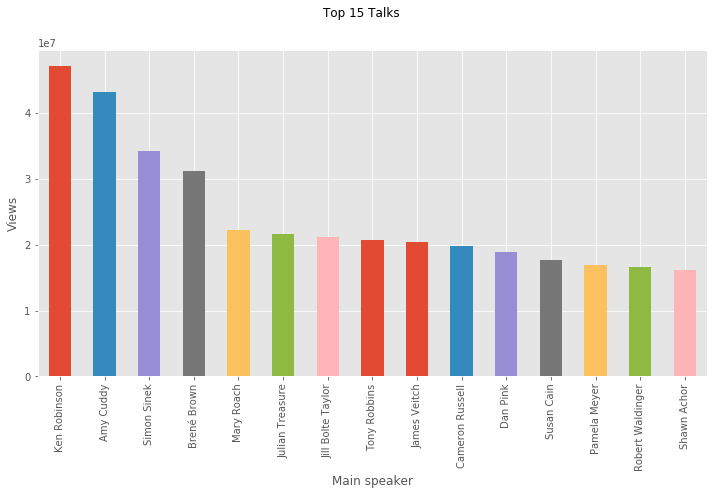

In [13]:
fig,axes = plt.subplots(figsize=(12,6))
dplot['views'].plot.bar()
plt.xlabel('Main speaker')
plt.ylabel('Views')
plt.suptitle('Top 15 Talks')

In [14]:
# use seaborn for the same plot
import seaborn as sns
%matplotlib inline

C:\Users\HAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


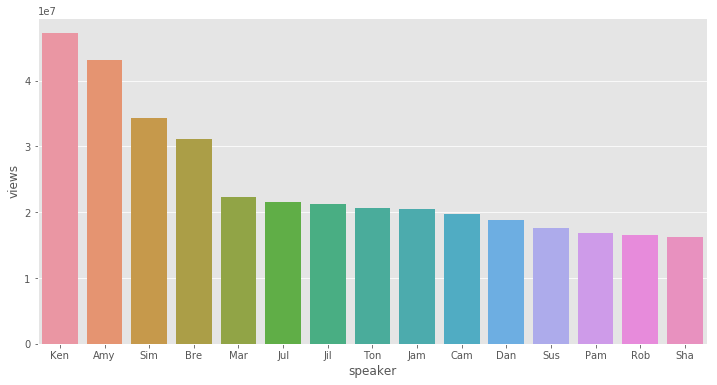

In [15]:
fig,axes = plt.subplots(figsize=(12,6))
dplot['speaker'] = ['Ken', 'Amy','Sim','Bre','Mar','Jul','Jil','Ton','Jam','Cam','Dan','Sus','Pam','Rob','Sha']
dplot.reset_index(drop = True)
sns.barplot(x = 'speaker',y = 'views',data = dplot)

### Distribution of TED Talk Views ###
Visualize the distribution of the views garnered on various TED Talks.

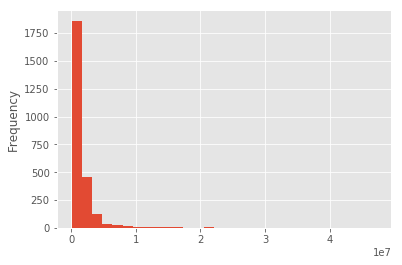

In [16]:
# using matplotlib to visualize the distribution ojf views
ted_main['views'].plot.hist(bins = 30)

C:\Users\HAN\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


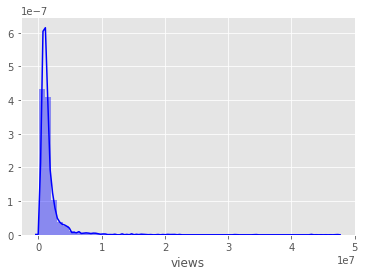

In [17]:
# using seaborn to visualize the distribution of the views garnered on various TED Talks
sns.distplot(ted_main['views'],color = 'blue')

The distribution is heavily skewed to the right.After 4 on the plot, the values are negligible. We can limit the value from 0 to 4000000 and then create a new plot

C:\Users\HAN\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


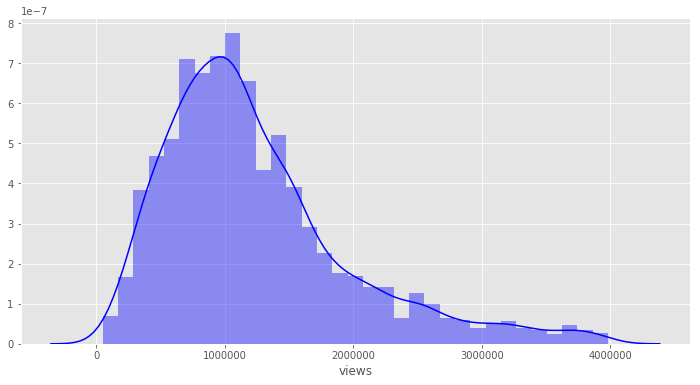

In [18]:
filtered = ted_main[(ted_main['views'] >= 0) & (ted_main['views'] <4000000)] # limit the range of views' values
fig,axes = plt.subplots(figsize=(12,6))
plt.style.use('ggplot')
sns.distplot(filtered['views'],color = 'blue')

[(0, 4000000)]

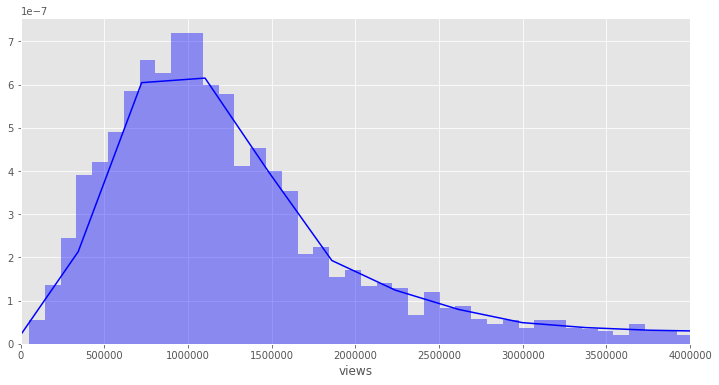

In [19]:
# alternatively
fig,axes = plt.subplots(figsize=(12,6))
ax = sns.distplot(ted_main['views'],bins = 500,color = 'blue')
ax.set(xlim=(0, 4000000))

### Average and Median number of Views ###
Compute the average and median number of views on TED Talks

In [20]:
# average views
ted_main['views'].mean()

1698297.4815686275

In [21]:
# median views
ted_main['views'].median()

1124523.5

### Scatterplot of Views vs Comments ###
Plot a scatterplot of the views and the number of comments

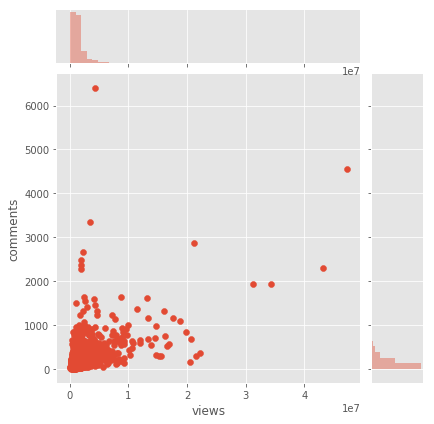

In [22]:
sns.jointplot(x = 'views', y = 'comments', data = ted_main, kind = 'scatter')

### Correlation between Views and Number of Comments ###
Compute the correlation between the views and the number of comments.
Explain what the numbers obtained mean.

In [23]:
ted_main.corr(method = 'pearson')

,comments,duration,languages,num_speaker,views
comments,1.000000,0.140694,0.318284,-0.035489,0.530939
duration,0.140694,1.000000,-0.295681,0.022257,0.048740
languages,0.318284,-0.295681,1.000000,-0.063100,0.377623
num_speaker,-0.035489,0.022257,-0.063100,1.000000,-0.026389
views,0.530939,0.048740,0.377623,-0.026389,1.000000


The correlation between comments and number of views is 0.5309. This means that views and the number of cooments have a positive relationship, that is, the number of comments tend to increase with the number of views.

### New Column , 'dis_quo' ###
Add a new column to the dataframe from ted_main.csv column that represents
the discussion quotient, you can call the column dis_quo. The column should be
the comments divided by the views. Analyze dis_quo

In [24]:
ted_main['dis_quo'] = ted_main.comments/ted_main.views

In [25]:
# check the head of ted_main to see if dis_quo has been added
ted_main.head(2)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,dis_quo
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096
1,265,With the same humor and humanity he exuded in ...,977,TED2006,2006-02-25,43,Al Gore,Al Gore: Averting the climate crisis,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,0.000083


In [26]:
# obtain summary statistics of dis_quo
ted_main.dis_quo.describe()

count    2550.000000
mean        0.000148
std         0.000161
min         0.000003
25%         0.000055
50%         0.000103
75%         0.000177
max         0.002220
Name: dis_quo, dtype: float64

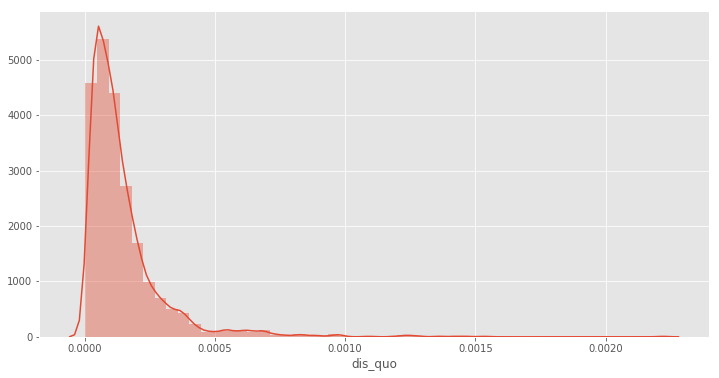

In [27]:
# check the disrtibution of dis_quo
fig,axes = plt.subplots(figsize=(12,6))
sns.distplot(ted_main['dis_quo'])

The new column, 'dis_quo', follow the same distribution as 'views'. The observations are skewed to the right. most values of dis_quo range in between 0.0000 and 0.00025

### TED Talks by Month and Day ###
Analyze the TED Talks by month and day and visualize the results.

We start by breaking down the column 'film_date' into year, month and day

In [28]:
# Create features for year, month, day
ted_main['film_year'] = ted_main['film_date'].dt.year
ted_main['film_month'] = ted_main['film_date'].dt.month_name().str.slice(stop=3)
ted_main['film_day'] = ted_main['film_date'].dt.weekday_name.str.slice(stop=3)
ted_main.head(2)

# To abbreviate the month and day names using the first three letters of their full names, we could first 
# break down the film_date column to month and day and then use dt.month_name() to get the full month name 
# and finally use str.slice() method to get the first three letters. Same applies to film_day

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,related_talks,speaker_occupation,tags,title,url,views,dis_quo,film_year,film_month,film_day
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-27 00:11:00,...,"[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096,2006,Feb,Sat
1,265,With the same humor and humanity he exuded in ...,977,TED2006,2006-02-25,43,Al Gore,Al Gore: Averting the climate crisis,1,2006-06-27 00:11:00,...,"[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,0.000083,2006,Feb,Sat


Now the data is ready for visualization

#### TED Talks by Month ####

Text(0.5, 0.98, 'TED Talks by Month')

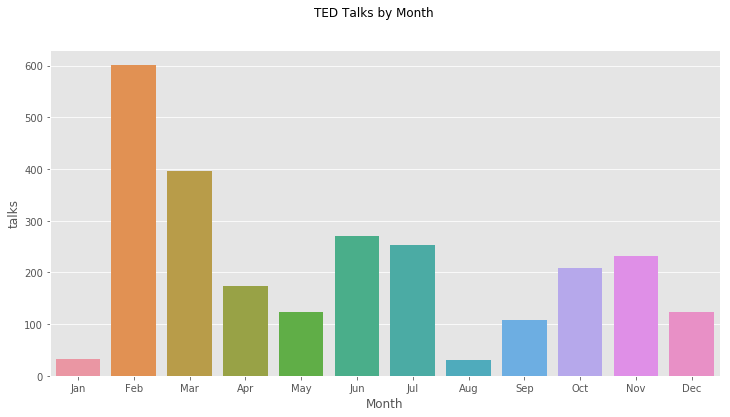

In [29]:
fig,axes = plt.subplots(figsize=(12,6))
sns.countplot(x = 'film_month',order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],data = ted_main)
plt.ylabel('talks')
plt.xlabel('Month')
plt.suptitle('TED Talks by Month')

#### TED Talks by Day ###

Text(0.5, 0.98, 'TED Talks by Day')

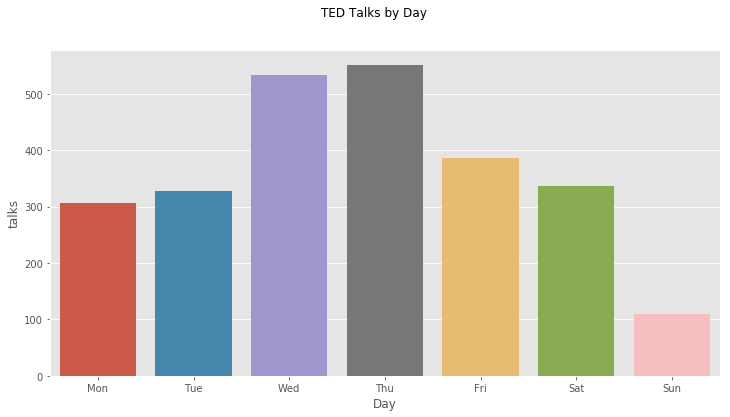

In [30]:
fig,axes = plt.subplots(figsize=(12,6))
sns.countplot(x = 'film_day',order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'],data = ted_main)
plt.ylabel('talks')
plt.xlabel('Day')
plt.suptitle('TED Talks by Day')

### TED Talks over Years ###
Visualize the number of TED Talks throughout the years. What are your
observations?

In [31]:
talks_years = pd.DataFrame(ted_main['film_year'].value_counts())
talks_years.reset_index(drop = False,inplace = True)


In [32]:
talks_years.columns

Index(['index', 'film_year'], dtype='object')

In [33]:
talks_years.head(3)

,index,film_year
0,2013,270
1,2011,270
2,2010,267


In [34]:
talks_years.rename(index=str, columns={"index":"year", "film_year":"talks"}, inplace=True)
talks_years.head(3)


,year,talks
0,2013,270
1,2011,270
2,2010,267


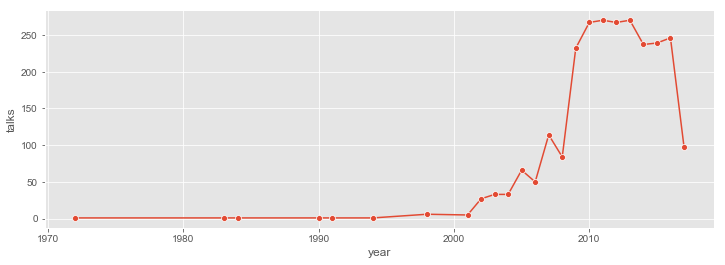

In [35]:
# lineplot
fig, axes = plt.subplots(figsize=(12,4))
sns.set(style="whitegrid")
sns.lineplot(x = 'year', y = 'talks',marker = 'o',data = talks_years)

([<matplotlib.axis.XTick at 0x4f811357b8>,
 <a list of 24 Text xticklabel objects>)

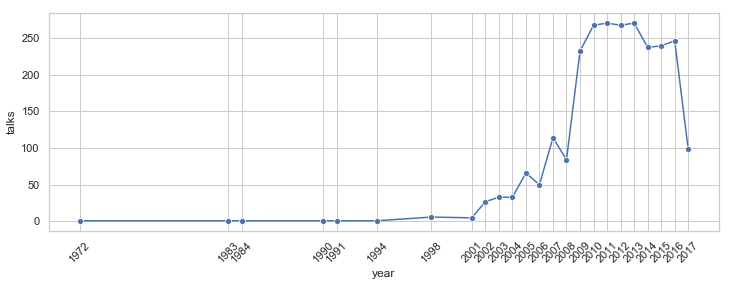

In [36]:
fig, axes = plt.subplots(figsize=(12,4))
sns.set(style="whitegrid")
sns.lineplot(x = 'year', y = 'talks',marker = 'o',data = talks_years)
plt.xticks(talks_years['year'], rotation = 45)

The number of TED Talks has been rising since 1972 to 2005 after which it had cyclical flactuations up to 2008. The Number of talks then rose sharply from 2008 and hit the peak in 2013 and then started declining.However, the decline was so sharp between 2016 and 2017.

### Heatmap ###
Using seaborn visualize something of your choosing using a Heatmap

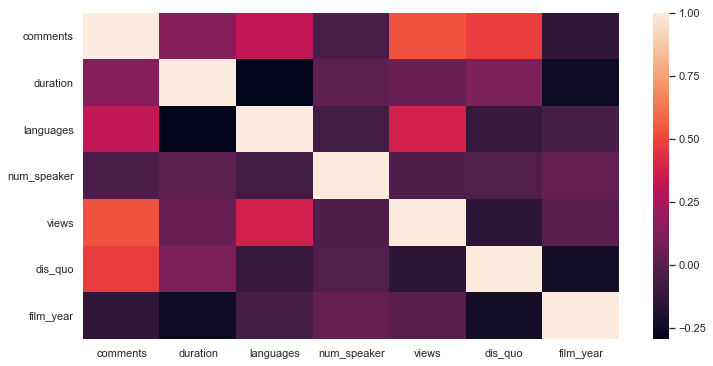

In [37]:
# visualize the correlation between all the numeric features in the dataset
fig,axes = plt.subplots(figsize=(12,6))
sns.heatmap(ted_main.corr())

The heatmap shows that views and comments are the most highly correlated in the dataset. This is in line with the initial findings we had. dis_quo and comments are also fairly correlated.

#### Heatmap of Number of Views by Month and Year ####

In [38]:
ted_main.pivot_table(values='views',index='film_month',columns='film_year')

film_year,1972,1983,1984,1990,1991,1994,1998,2001,2002,2003,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
film_month,,,,,,,,,,,,,,,,,,,,,
Apr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.026589e+06,6.324436e+05,4.984070e+05,1.160436e+06,2.930482e+06,2.049668e+06,2.221137e+06,1.353722e+06,1.190688e+06
Aug,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.604930e+05,1.348390e+06,1.356205e+05,1.003863e+06,8.913194e+05,1.934350e+06,1.880090e+06,1.059199e+06,5.488895e+05
Dec,NaN,NaN,NaN,NaN,318423.0,NaN,NaN,NaN,NaN,NaN,...,2.004036e+06,2.923950e+05,1.368577e+06,8.993559e+05,1.189589e+06,2.504863e+06,1.498303e+06,3.385408e+06,9.697084e+05,NaN
Feb,NaN,NaN,974087.0,NaN,NaN,581419.0,750886.333333,1774926.25,9.506535e+05,1.132067e+06,...,2.050622e+06,1.754896e+06,1.764113e+06,7.913110e+05,2.156917e+06,2.381602e+06,2.049529e+06,8.542260e+05,1.786242e+06,1.427361e+06
Jan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.169790e+05,NaN,5.776993e+05,8.826810e+05,1.930874e+06,1.250620e+06,1.461811e+06,1.653664e+06,1.651655e+06,1.102091e+06
Jul,NaN,521974.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.167444e+06,1.676057e+06,1.339826e+06,1.706333e+06,1.850601e+06,1.354421e+06,1.596663e+06,1.852632e+06,1.087934e+06,7.296630e+05
Jun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.977855e+05,1.323357e+06,3.807279e+06,9.856946e+05,1.929330e+06,2.506479e+06,1.713748e+06,2.321632e+06,1.442791e+06,4.504300e+05
Mar,NaN,NaN,NaN,620806.0,NaN,NaN,NaN,NaN,1.051167e+06,5.819735e+05,...,1.982364e+06,7.901352e+05,1.230487e+06,1.873233e+06,1.821549e+06,1.476272e+06,2.020655e+06,1.977884e+06,1.679114e+06,1.034554e+06
May,1028630.0,NaN,NaN,NaN,NaN,NaN,NaN,473220.00,NaN,NaN,...,9.259401e+05,7.027365e+05,1.300310e+06,1.985446e+06,1.140413e+06,2.377745e+06,2.191612e+06,1.713375e+06,1.303093e+06,NaN


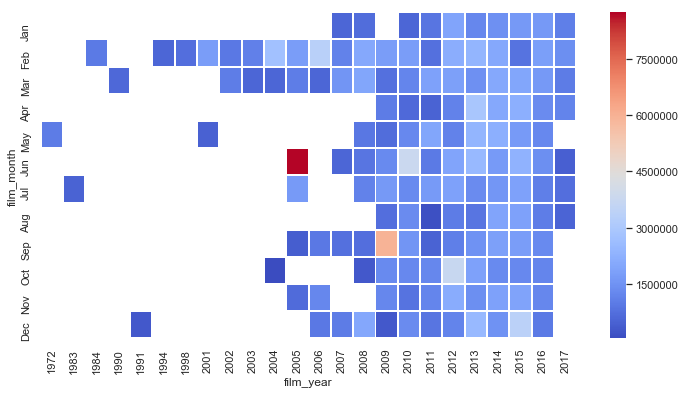

In [39]:
film_month = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
pvt = ted_main.pivot_table(values='views',index='film_month',columns='film_year') # create a pivot table
fig,axes = plt.subplots(figsize=(12,6))
pvtdata = pvt.reindex(film_month) # reorder the months
sns.heatmap(pvtdata,cmap='coolwarm',linecolor='white',linewidths=1) #heatmap

The heatmap shows that the highest number of views was attained in June 2005. However, most of the monthly views are concentrated around 1500000; which is the region of around which the mean value of views lie.
We can try exploring our dataset in efforts to validate this the date when maximum views were achieved.

In [40]:
ted_main['views'].max()

47227110

In [41]:
ted_main[ted_main['views']== 47227110]

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,related_talks,speaker_occupation,tags,title,url,views,dis_quo,film_year,film_month,film_day
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-27 00:11:00,...,"[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096,2006,Feb,Sat


The findings show that the maximum number of views was reached in February 2006. This is different from what we find from the heatmap but the discrepancy can be explained by the fact that the maximum value is an outlier and is not accomodated in the legend. 

### Most Popular Speakers ###
Who are the most popular TED Speakers?

In [42]:
ted_main['main_speaker'].value_counts().head(10)


Hans Rosling            9
Juan Enriquez           7
Rives                   6
Marco Tempest           6
Dan Ariely              5
Jacqueline Novogratz    5
Clay Shirky             5
Nicholas Negroponte     5
Bill Gates              5
Julian Treasure         5
Name: main_speaker, dtype: int64

### Speakers' Occupations ###
Which occupation should you choose if you want to become a TED Speaker?

In [43]:
ted_main['speaker_occupation'].value_counts()

Writer                                   45
Designer                                 34
Artist                                   34
Journalist                               33
Entrepreneur                             31
Architect                                30
Inventor                                 27
Psychologist                             26
Photographer                             25
Filmmaker                                21
Economist                                20
Author                                   20
Neuroscientist                           20
Educator                                 20
Roboticist                               16
Philosopher                              16
Biologist                                15
Physicist                                14
Musician                                 11
Marine biologist                         11
Global health expert; data visionary     10
Activist                                 10
Technologist                    

In [44]:
occupation = pd.DataFrame(ted_main['speaker_occupation'].value_counts().head(10))
occupation.reset_index(drop = False, inplace = True)
occupation

,index,speaker_occupation
0,Writer,45
1,Designer,34
2,Artist,34
3,Journalist,33
4,Entrepreneur,31
5,Architect,30
6,Inventor,27
7,Psychologist,26
8,Photographer,25
9,Filmmaker,21


In [45]:
occupation.rename(index=str, columns={"index":"speaker_occupation", "speaker_occupation":"appearances"}, inplace=True)
occupation.head(3)

,speaker_occupation,appearances
0,Writer,45
1,Designer,34
2,Artist,34


Text(0.5, 0.98, 'TED Speaker Occupation')

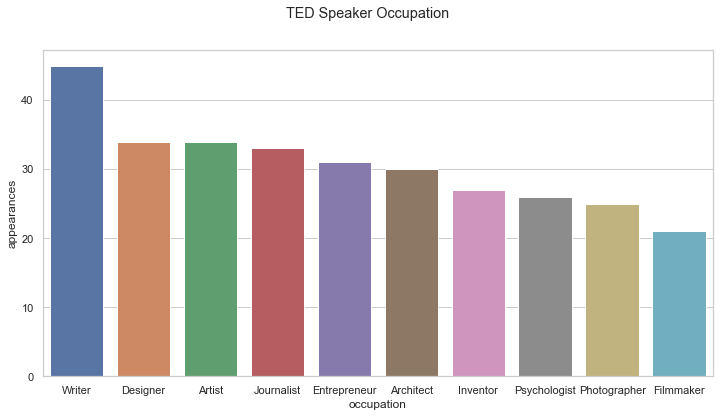

In [46]:
fig,axes = plt.subplots(figsize=(12,6))
sns.barplot(x = 'speaker_occupation',y = 'appearances',data = occupation)
plt.ylabel('appearances')
plt.xlabel('occupation')
plt.suptitle('TED Speaker Occupation')

Visualize the relationship between the top 10 most popular professions and the
views they garnered in the form of a box plot.

Text(0.5, 0.98, 'TED Speaker Occupation')

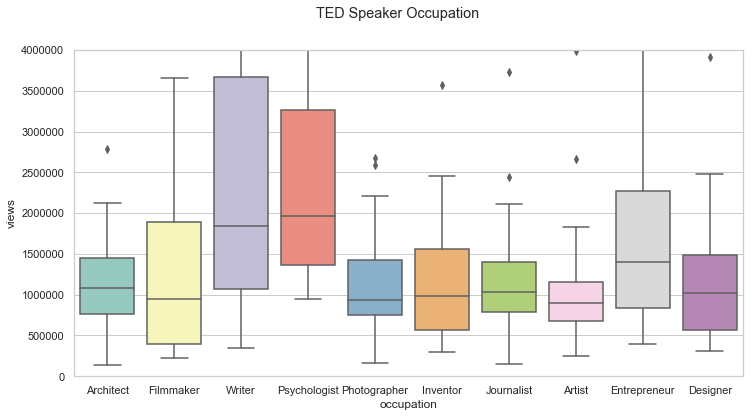

In [47]:
profession = ted_main[(ted_main['speaker_occupation']=='Writer')| (ted_main['speaker_occupation']=='Artist')|(ted_main['speaker_occupation']=='Designer')|(ted_main['speaker_occupation']=='Journalist')|
        (ted_main['speaker_occupation']=='Entrepreneur')|(ted_main['speaker_occupation']=='Architect')|
         (ted_main['speaker_occupation']=='Inventor')|(ted_main['speaker_occupation']=='Psychologist')|
         (ted_main['speaker_occupation']=='Photographer')|(ted_main['speaker_occupation']=='Filmmaker')]
fig,axes = plt.subplots(figsize=(12,6))
sns.boxplot(x = 'speaker_occupation',y = 'views',data = profession,palette="Set3")
plt.ylim(0,4000000)
plt.ylabel('views')
plt.xlabel('occupation')
plt.suptitle('TED Speaker Occupation')

### Talks with multiple speakers ###
How many talks have had more than one speaker?

In [48]:
ted_main['num_speaker'].value_counts()

1    2492
2      49
3       5
4       3
5       1
Name: num_speaker, dtype: int64

In [49]:
# alternatively, we uses boolean indexing to return a datases with number of speakers > 1
# and then check the length
len(ted_main[ted_main['num_speaker']>1])

58

### Which are these TED Talks? ###
Which TED Events tend to hold the most number of TED.com upload worthy
events?

In [50]:
ted_main['event'].value_counts()[:15]

TED2014           84
TED2009           83
TED2013           77
TED2016           77
TED2015           75
TED2011           70
TEDGlobal 2012    70
TED2010           68
TED2007           68
TEDGlobal 2011    68
TED2017           67
TEDGlobal 2013    66
TEDGlobal 2009    65
TED2012           65
TED2008           57
Name: event, dtype: int64

### Languages at TED ###
Perform basic data visualization and descriptive statistics about languages at TED.

In [51]:
# descriptive statistics
ted_main.languages.describe()

count    2550.000000
mean       27.326275
std         9.563452
min         0.000000
25%        23.000000
50%        28.000000
75%        33.000000
max        72.000000
Name: languages, dtype: float64

Plot a joint plot of the languages against the views and explain the results
obtained.

In [52]:
import scipy.stats as stats 

C:\Users\HAN\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


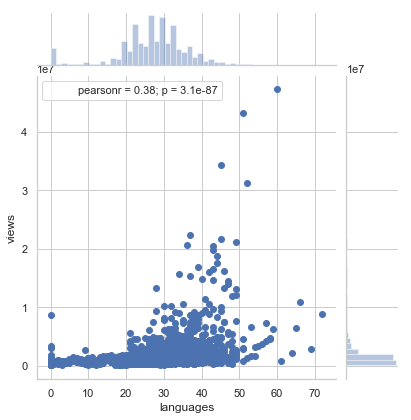

In [53]:
h = sns.jointplot(x = 'languages', y = 'views', data = ted_main, kind = 'scatter')
h.annotate(stats.pearsonr) # to display Pearson's correlation on the plot

Language and views slightly increase together as justified by the correlation value of 0.38. This means that as the TED Talks are delivered/translated into many languages, the number of views increase. This is in line with our intuition that as the number of languages increase, the audience become large, hence, more views.Of interest is that the two features seem to be clustered together at the values of language = 20:50 and views 0:1000000.

### Add theme column ###
Add a theme column to your dataset and visualize the results.

TED Talk themes can be extracted fro the 'tags' column in the dataset.Each row in the column contain several themes. We need to extract each word, determine and determine its frequency so as to know the most common themes.

In [74]:
import string

In [76]:
# Create function using string.punctuation to remove all punctuation
text_data = ted_main['tags']
def remove_punctuation(sentence: str) -> str:
    return sentence.translate(str.maketrans('', '', string.punctuation))

# Apply function
txt_data = [remove_punctuation(sentence) for sentence in text_data]
txt_data[:10] # get the first 10 entries of the column

['children creativity culture dance education parenting teaching',
 'alternative energy cars climate change culture environment global issues science sustainability technology',
 'computers entertainment interface design media music performance simplicity software technology',
 'MacArthur grant activism business cities environment green inequality politics pollution',
 'Africa Asia Google demo economics global development global issues health math statistics visualizations',
 'business culture entertainment goalsetting motivation potential psychology',
 'Christianity God atheism comedy culture humor performance religion storytelling',
 'architecture collaboration culture design library',
 'God TED Brain Trust atheism brain cognitive science consciousness evolution philosophy religion',
 'Christianity God culture happiness leadership motivation philanthropy religion']

In [57]:
# Convert the txt_data to a data frame, split the words and obtain their frequencies
df=pd.DataFrame(txt_data,columns=['text']) # converting to a dataframe
theme_counts = df.text.apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0) #split the words by 'space' and count the number of times each word appears in the column
theme_counts

education         153.0
dance              25.0
parenting          50.0
creativity        189.0
culture           486.0
teaching           43.0
children          143.0
energy            122.0
sustainability     80.0
climate            87.0
cars               29.0
technology        727.0
change            305.0
science           675.0
issues            501.0
global            565.0
environment       165.0
alternative        37.0
software           45.0
entertainment     299.0
performance       140.0
computers         111.0
interface          28.0
media             120.0
music             220.0
design            526.0
simplicity         14.0
politics          128.0
grant              13.0
activism          157.0
                  ...  
machine            18.0
skateboarding       1.0
augmented           2.0
forensics           3.0
painting            8.0
pandemic            3.0
meditation          7.0
mindfulness         5.0
Syria               8.0
Transgender         7.0
testing         

In [69]:
top_themes = pd.DataFrame(theme_counts[theme_counts>280].sort_values(ascending = False))
top_themes.reset_index(drop = False,inplace = True)

In [70]:
top_themes.head(3)

,index,0
0,technology,727.0
1,science,675.0
2,global,565.0


In [71]:
top_themes.rename(index=str, columns={"index":"theme", 0:"counts"}, inplace=True)
top_themes.head(3)

,theme,counts
0,technology,727.0
1,science,675.0
2,global,565.0


Text(0.5, 0.98, 'TED Talk Themes')

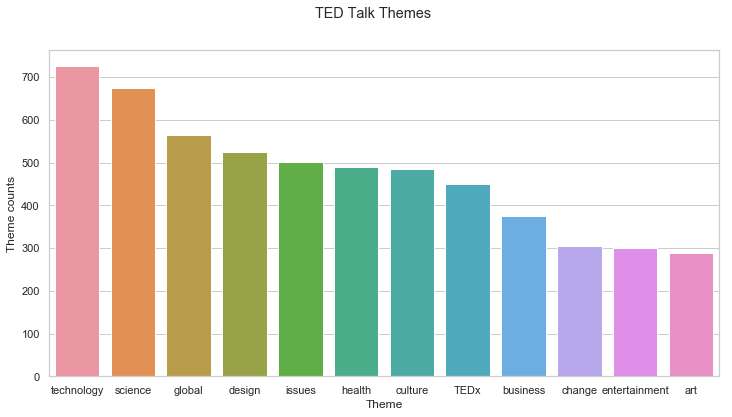

In [72]:
fig,axes = plt.subplots(figsize=(12,6))
sns.barplot(x = 'theme',y = 'counts',data = top_themes)
plt.ylabel('Theme counts')
plt.xlabel('Theme')
plt.suptitle('TED Talk Themes')

### Word Cloud ###
Using the Python word cloud library generate the following word cloud from the transcripts dataset.

In [94]:
# load the dataset
trans_data = pd.read_csv('transcripts.csv')
trans_data.head(4)

,transcript,url
0,Good morning. How are you?(Laughter)It's been ...,https://www.ted.com/talks/ken_robinson_says_sc...
1,"Thank you so much, Chris. And it's truly a gre...",https://www.ted.com/talks/al_gore_on_averting_...
2,"(Music: ""The Sound of Silence,"" Simon & Garfun...",https://www.ted.com/talks/david_pogue_says_sim...
3,If you're here today — and I'm very happy that...,https://www.ted.com/talks/majora_carter_s_tale...


In [95]:
# load the required library
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

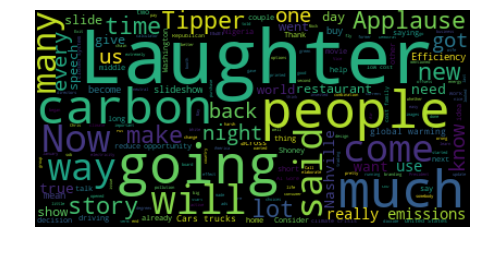

In [100]:
# Let's start with one talk
text = trans_data.transcript[1]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)
# Display the generated image:
plt.figure(figsize = (8,4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Now we'll combine all TED Talks transcripts into one big text and create a big fat cloud to see which characteristics are most common in these talks.

In [101]:
text = " ".join(talk for talk in trans_data.transcript)
print ("There are {} words in the combination of all talk".format(len(text)))

There are 28221326 words in the combination of all talk


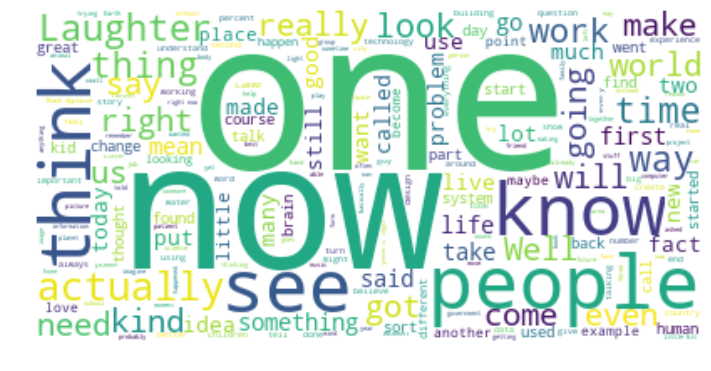

In [104]:
# Create stopword list:
stopwords = set(STOPWORDS)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize = (12,18))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Speaker Occupation and Talk Duration ####
Which occupations have spekers deliver longer talks on average?

In [116]:
occ_duration = ted_main.groupby('speaker_occupation')

In [115]:
occ_duration.mean().sort_values(by="duration",ascending=False).head(10)

,comments,duration,languages,num_speaker,views,dis_quo,film_year
speaker_occupation,,,,,,,
"Author, satirist",101.00,5256.0,0.00,1.0,473220.00,0.000213,2001.000000
"TV journalist, women's empowerment advocate",42.00,2853.0,5.00,4.0,890478.00,0.000047,2017.000000
Provocateur,121.00,2761.0,0.00,1.0,251313.00,0.000481,2009.000000
Juggler,82.00,2222.0,18.00,1.0,944836.00,0.000087,2002.000000
"Deputy director, NSA",440.00,2010.0,22.00,1.0,1191342.00,0.000369,2014.000000
Professor,248.75,1920.0,17.25,1.0,652840.25,0.000408,2010.250000
"Entrepreneur, marketer",62.00,1899.0,17.00,1.0,250722.00,0.000247,2007.000000
Close-up card magician,109.00,1868.0,21.00,1.0,4204848.00,0.000026,2005.000000
Serial entrepreneur,333.50,1857.0,26.50,1.0,5115125.50,0.000068,2015.000000
